In [2]:
# !pip install beautifulsoup4
# !pip install requests
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
soup = requests.get(url)
soup

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
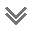

In [3]:
codes = soup.text
codes = BeautifulSoup(codes, "lxml")
codes

In [4]:
table_codes =codes.table
tags = table_codes.find_all('tr')
tags

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [5]:
data = []
for tag in tags:
  y = tag.text.split('\n')
  if y[1] !='':
    data.append(y[1:])

data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['1',
  'USA',
  '99,639,207',
  '',
  '1,098,221 ',
  '',
  '97,149,970',
  '',
  '1,391,016',
  '2,625',
  '297,207',
  '3,276',
  '1,132,204,334',
  '3,377,175',
  '335,251,946 ',
  'North America',
  '33050',
  '',
  '',
  '4,149',
  ''],
 ['2',
  'India',
  '44,660,579',
  '',
  '530,500 ',
  '',
  '44,115,240',
  '',
  '14,839',
  '698',
  '31,635',
  '376',
  '901,728,285',
  '638,729',
  '1,411,755,086 ',
  'Asia',
  '322,6612',
  '',
  '',
  '11',
  ''],
 ['3',
  'France',
  '36,946,904',
  '',
  '157,277 ',
  '',
  '36,101,330',
  '',
  '688,297',
  '869',
  '56

In [6]:
import csv
with open('covid_data.csv','w') as f:
  x  = csv.writer(f)
  x.writerows(data)


In [7]:
pwd

'C:\\Users\\Administrator\\python_8_am'

In [3]:
import pandas as pd
df = pd.read_csv('covid_data.csv',encoding = 'ISO-8859-1')
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Unnamed: 22
0,1,USA,"99,639,207",NaN,"1,098,221",NaN,"97,149,970",NaN,"1,391,016","2,625",...,"3,377,175","335,251,946",North America,33050,NaN,NaN,"4,149",NaN,NaN,NaN
1,2,India,"44,660,579",NaN,"530,500",NaN,"44,115,240",NaN,"14,839",698,...,"638,729","1,411,755,086",Asia,"322,6612",NaN,NaN,11,NaN,NaN,NaN
2,3,France,"36,946,904",NaN,"157,277",NaN,"36,101,330",NaN,"688,297",869,...,"4,137,853","65,611,363",Europe,24170,NaN,NaN,"10,491",NaN,NaN,NaN
3,4,Germany,"35,823,771",NaN,"154,535",NaN,"34,389,600","+20,800","1,279,636","1,406",...,"1,449,253","84,410,641",Europe,25461,NaN,NaN,"15,160",NaN,NaN,NaN
4,5,Brazil,"34,892,134",NaN,"688,419",NaN,"34,067,695",NaN,"136,020","8,318",...,"295,130","216,094,853",South America,63143,NaN,NaN,629,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Vatican City,29,NaN,,NaN,29,NaN,0,NaN,...,NaN,806,Europe,28,NaN,NaN,NaN,NaN,NaN,NaN
226,227,Tuvalu,23,NaN,,NaN,NaN,NaN,23,NaN,...,NaN,"12,133",Australia/Oceania,528,NaN,NaN,"1,896",NaN,NaN,NaN
227,228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,...,NaN,"631,724",Africa,"63,172631,724",NaN,NaN,NaN,NaN,NaN,NaN
228,229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
country = df['Country,Other'][0:10]
country

0         USA
1       India
2      France
3     Germany
4      Brazil
5    S. Korea
6          UK
7       Italy
8       Japan
9      Russia
Name: Country,Other, dtype: object

In [7]:
country = list(df['Country,Other'][0:10])
totalcases = list(df['TotalCases'][0:10])

totalcases
#     z = i.replace(',','')

['99,639,207',
 '44,660,579',
 '36,946,904',
 '35,823,771',
 '34,892,134',
 '25,838,239',
 '23,930,041',
 '23,642,011',
 '22,674,944',
 '21,463,850']

In [8]:
country = list(df['Country,Other'][0:10])
totalcases = list(df['TotalCases'][0:10])

totalCases=[]
for i in totalcases:
    z = i.replace(',','')
    totalCases.append(int(z))
totalCases


[99639207,
 44660579,
 36946904,
 35823771,
 34892134,
 25838239,
 23930041,
 23642011,
 22674944,
 21463850]

In [11]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=country , y=totalCases)])
fig.show()

In [10]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Pie(labels=country, values=totalCases)])
fig.show()